In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [30]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [40]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [41]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
	arr=np.random.choice(x,(n_bootstraps, sample_size))
	data_mean = np.mean(arr)
	bt_mean = np.std(arr,axis=1)
	data_mean = np.mean(arr)
	lower = np.percentile(bt_mean, 2.5)
	upper = np.percentile(bt_mean, 97.5)
	return data_mean, lower, upper


(9.204107142857143, 2.730216407659485, 7.367927250440408)


c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


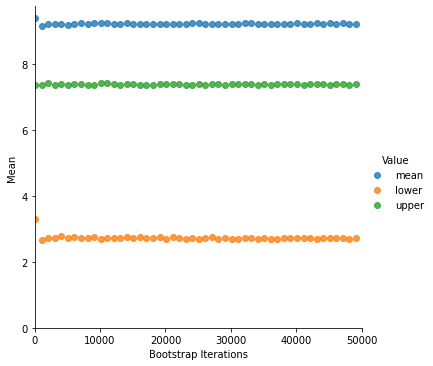

In [45]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

print(bootstrap_mean(data, data.shape[0], 10000))


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [36]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	arr=np.random.choice(sample,(n_bootstraps, sample_size))
	data_mean = np.mean(arr)
	bt_mean = np.mean(arr,axis=1)
	lower = np.percentile(bt_mean, (100-ci)/2)
	upper = np.percentile(bt_mean, (100+ci)/2)
	return data_mean, lower, upper

In [53]:
def bootstrap_sd_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	arr=np.random.choice(sample,(n_bootstraps, sample_size))
	data_mean = np.mean(arr)
	bt_mean = np.std(arr,axis=1)
	lower = np.percentile(bt_mean, (100-ci)/2)
	upper = np.percentile(bt_mean, (100+ci)/2)
	return data_mean, lower, upper


(30.481070886075948, 4.882132105762434, 7.167868246682166)


[6.28571429 6.35714286 6.42857143 6.42857143 6.42857143 6.42857143
 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143
 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143
 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143
 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143
 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143
 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143 6.42857143
 6.42857143 6.42857143 6.42857143 6.5        6.5        6.5
 6.5        6.74821429]
[12.21428571 12.21428571 12.28571429 12.28571429 12.28571429 12.28571429
 12.28571429 12.28571429 12.32678571 12.35714286 12.35714286 12.35714286
 12.35714286 12.35714286 12.35714286 12.35714286 12.35714286 12.35714286
 12.35714286 12.35714286 12.35714286 12.35714286 12.35714286 12.35714286
 12.35714286 12.35714286 12.35714286 12.35714286 12.35714286 12.35714286
 12.35714286 12.35714286 12.35714286 12.35714286 12.35714286 12.35714286
 12.35714

c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


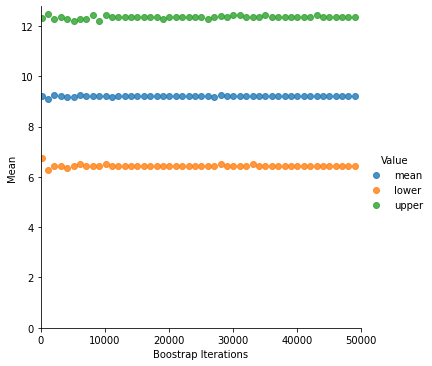

In [44]:
boots = []
m=[]
l=[]
u=[]
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])
    m.append(boot[0])
    l.append(boot[1])
    u.append(boot[2])
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)
m=np.sort(m)
l=np.sort(l)
u=np.sort(u)
#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')
print(l)
print(u)

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [8]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
curr = df.values.T[0]
d=df.dropna()
nw=d.values.T[1]
print(nw)

[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32.]


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

[5.48122069 5.59673923 5.59705937 5.59855652 5.59915454 5.6088952
 5.61614363 5.61615936 5.61635539 5.61665265 5.61740213 5.61742033
 5.61778223 5.61833957 5.61964056 5.62099339 5.62100025 5.62155159
 5.62165343 5.6224785  5.62262026 5.62356182 5.62373561 5.62401106
 5.62406901 5.62451634 5.62476496 5.62479299 5.62562223 5.62613717
 5.62668772 5.62706049 5.62746742 5.6284399  5.62867483 5.62933189
 5.62951024 5.63055475 5.63287661 5.63288301 5.6330916  5.63314855
 5.63657943 5.63885577 5.63896503 5.63953796 5.64043035 5.6410636
 5.66434971 5.66773777]
[7.01335172 7.08031697 7.08792131 7.09126254 7.09738855 7.10190871
 7.10306796 7.10353116 7.10554007 7.10590803 7.10629588 7.1067221
 7.10834056 7.1091772  7.10986465 7.11039972 7.11272373 7.11296736
 7.11323522 7.11396709 7.11419787 7.11441919 7.1144775  7.1150741
 7.11520647 7.11661315 7.11671125 7.11681604 7.11741552 7.11812874
 7.11936711 7.12024162 7.12143794 7.1215972  7.12164387 7.12193617
 7.12271466 7.1236831  7.12373544 7.124391

c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


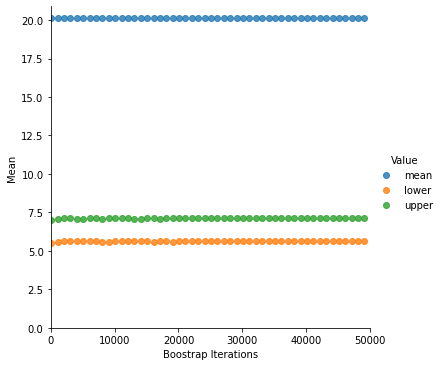

In [26]:
# <---INSERT YOUR CODE HERE--->
#for i in range(0,10000):
boot_curr = bootstrap_mean_ci(curr,curr.shape[0],1,95)
boot_nw = bootstrap_mean_ci(nw,nw.shape[0],1,95)

#boot_new=bootstrap_mean_ci(new,new.shape[0],1,95)
#boots_curr.append([i, boot_curr[0], "mean"])
#boots_curr.append([i, boot_curr[1], "lower"])
 # boots_curr.append([i, boot_curr[2], "upper"])
 # boots_new.append([i, boot_new[0], "mean"])
  #boots_new.append([i, boot_new[1], "lower"])
  #boots_new.append([i, boot_new[2], "upper"])
#df_boot = pd.DataFrame(boots_curr, columns=['Boostrap Iterations', 'Mean', "Value"])
#sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

#sns_plot.axes[0, 0].set_ylim(0,)
#sns_plot.axes[0, 0].set_xlim(0, 50000)
#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')
boots = []
m=[]
l=[]
u=[]
for i in range(100, 50000, 1000):
    boot = bootstrap_sd_ci(curr, curr.shape[0], i, 99)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])
    m.append(boot[0])
    l.append(boot[1])
    u.append(boot[2])
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)
m=np.sort(m)
l=np.sort(l)
u=np.sort(u)
#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')
print(l)
print(u)

In [61]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    sample1_m=np.mean(sample1)
    sample2_m=np.mean(sample2)
    t_obs=sample2_m-sample1_m
    count=0
    for i in range(n_permutations):
      concat=np.concatenate([sample1,sample2])
      perm=np.random.permutation(concat)
      pold = perm[:int(len(perm)/2)]
      pnew = perm[int(len(perm)/2):]
      pold_m = np.mean(pold)
      pnew_m= np.mean(pnew)
      t_perm=pnew_m-pold_m
      if(t_perm>t_obs):
        count+=1
      pvalue=count/n_permutations

    return pvalue

In [62]:
permut_test(curr, nw ,20000)

0.0

In [55]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [56]:
print(len(dem_share_PA),
len(dem_share_OH))
dem_share_PA=np.array(dem_share_PA)
dem_share_OH=np.array(dem_share_OH)

67 88


[42.31971194 42.70136866 42.71042388 42.71177313 42.72787463 42.74790896
 42.75039851 42.75262537 42.76283433 42.76402537 42.76745224 42.76886269
 42.77029403 42.77043134 42.77148955 42.77237015 42.77326567 42.77337612
 42.77670448 42.77876269 42.7808791  42.78164179 42.78252687 42.78265373
 42.7837194  42.78398806 42.78432239 42.78566866 42.78579851 42.787
 42.78865522 42.78983582 42.78997313 42.79013582 42.79085224 42.79087164
 42.79088358 42.79089254 42.79159254 42.79250448 42.79318507 42.79342836
 42.7949194  42.79594627 42.79626866 42.79879403 42.79908209 42.79967313
 42.79999851 42.80074478 42.80104179 42.80208657 42.80327164 42.80490746
 42.80521493 42.8068597  42.8081791  42.80879254 42.80887612 42.8093791
 42.81102687 42.81188806 42.81281642 42.81311343 42.81313284 42.81356269
 42.8138806  42.81399701 42.81445224 42.81504627 42.81720299 42.81746119
 42.81759701 42.81760746 42.81787015 42.81939552 42.82089104 42.8225194
 42.82477463 42.82536567 42.82566716 42.82637463 42.826855

c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


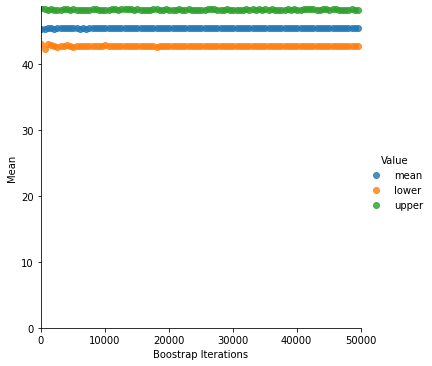

In [57]:
boots = []
count=0
m=[]
l=[]
u=[]
for i in range(100, 50000, 500):
    boot = bootstrap_mean_ci(dem_share_PA, dem_share_PA.shape[0], i, 98)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])
    count+=1
    m.append(boot[0])
    l.append(boot[1])
    u.append(boot[2])
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)
m=np.sort(m)
l=np.sort(l)
u=np.sort(u)
#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')
print(l)
print(u)

In [84]:
permut_test(dem_share_OH, dem_share_PA ,10000  )

0.2372

In [79]:
print(bootstrap_sd_ci(data,data.shape[0], 10000   ,90))

(9.226057142857142, 3.0338229402279002, 7.135710710709815)


In [82]:
print(bootstrap_mean_ci(dem_share_PA, dem_share_PA.shape[0], 20000 ,95))

(45.48962055223881, 43.2411828358209, 47.85608955223879)
